<a href="https://colab.research.google.com/github/betty6you/TeamProject_group6/blob/main/Vacc_Reactions_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-03-17 23:59:34,The only way #COVID19 can mutate with variants...,way mutate variants virus replicate hosts peop...,kemsunde,Unknown,"['COVID19', 'CovidVaccine', 'GetTheFactsGetThe...",Unknown
1,2021-03-17 23:59:20,I've now officially had my 1st dose of the #Co...,ive officially dose covidvaccine definitely wo...,ManeckiN,The Wild Western Wastes,"['CovidVaccine', 'COVID19', 'PfizerVaccine', '...",Unknown
2,2021-03-17 23:58:31,@hendopolis Imagine if the #Brexit referendum ...,hendopolis imagine brexit referendum held secr...,raymasseytweets,England,"['Brexit', 'EU', 'TrueColours', 'Impfstoff', '...",United Kingdom
3,2021-03-17 23:58:03,@EICostheta @RicBarraArch1 @insiders Yep. The ...,eicostheta insiders yep liarsnparasites narrow...,MikeFitzAU,Mudjimba,"['LiarsNParasites', 'CovidVaccine']",Australia
4,2021-03-17 23:57:37,This sounds like an important topic for @NickS...,sounds like important topic nicksawyermd tnich...,stephjantzen,Greater Sacramento,"['FiresideChat', 'CovidVaccine']",Brazil
...,...,...,...,...,...,...,...
352017,2021-04-03 18:39:22,RT @citymississauga: #COVID19Vaccine Booking T...,rt citymississauga booking tip wondering frien...,AnwarKnight,Toronto,['COVID19Vaccine'],Canada
352018,2021-04-03 18:39:13,RT @iamwandasykes: We’re fully vaccinated and ...,rt iamwandasykes fully vaccinated rejuvenated ...,HarrisTryonLab,Dallas,[],United States
352019,2021-04-03 18:39:04,#CovidVaccine and Weird Thoughts by Diane Burt...,covidvaccine weird thoughts diane burton https...,dla1950,http://,['CovidVaccine'],Japan
352020,2021-04-03 18:38:54,RT @ProfPatOConnor: It’s nice to know that the...,rt profpatoconnor nice know ambitions ceo hse ...,Pepeb72,Cork,[],Ireland


In [2]:
# importing pandas module  
import pandas as pd  
# importing numpy module 
import numpy as np
# importing module for regex 
import re 
import matplotlib.pyplot as plt
# reading csv file having processed tweet reactions data column 
data_frame = pd.read_csv("ProcessedCovidVaccineReact.csv")
column_selected = data_frame[["CleanedTweet"]]
data = column_selected.copy()

In [3]:
# counting the frequency of each reaction by observing tweet patterns 
data["ct1"]= data["CleanedTweet"].str.count("fever", re.I) 
data["ct2"]= data["CleanedTweet"].str.count( "chills", re.I) 
data["ct3"]= data["CleanedTweet"].str.count( "headache", re.I) 
data["ct4"]= data["CleanedTweet"].str.count( "neck pain", re.I) 
data["ct5"]= data["CleanedTweet"].str.count( "cold", re.I) 
data["ct6"]= data["CleanedTweet"].str.count( "flu", re.I) 
data["ct7"]= data["CleanedTweet"].str.count( "body pain", re.I) 
data["ct8"]= data["CleanedTweet"].str.count( "body pains", re.I)
data["ct9"]= data["CleanedTweet"].str.count( "sore arm", re.I)
data["ct10"]= data["CleanedTweet"].str.count( "arm soreness", re.I)
data["ct11"]= data["CleanedTweet"].str.count( "arm sore", re.I)
data["ct12"]= data["CleanedTweet"].str.count( "swollen", re.I)
data["ct13"]= data["CleanedTweet"].str.count( "injection area", re.I)
data["ct14"]= data["CleanedTweet"].str.count( "tender arm", re.I)
data["ct15"]= data["CleanedTweet"].str.count( "cough", re.I)
data["ct16"]= data["CleanedTweet"].str.count( "coughing", re.I)
data["ct17"]= data["CleanedTweet"].str.count( "sore throat", re.I)
data["ct18"]= data["CleanedTweet"].str.count( "vomiting", re.I)
data["ct19"]= data["CleanedTweet"].str.count( "throw up", re.I)
data["ct20"]= data["CleanedTweet"].str.count( "nausea", re.I)

data["ct21"]= data["CleanedTweet"].str.count( "all good", re.I)
data["ct22"]= data["CleanedTweet"].str.count( "so good", re.I)
data["ct23"]= data["CleanedTweet"].str.count( "so safe", re.I)
data["ct24"]= data["CleanedTweet"].str.count( "all safe", re.I)
data["ct25"]= data["CleanedTweet"].str.count( "no side affect", re.I)
data["ct26"]= data["CleanedTweet"].str.count( "no side affects", re.I)


In [5]:
#aggrigating the similar reactions to one type
data["Fever"] = data["ct1"] 
data["Chills"] = data["ct2"]
data["Headache"]= data["ct3"] 
data["Neck_pain"]= data["ct4"]
data["Cold"]= data["ct5"] + data["ct6"]
data["Body_pains"]= data["ct7"] + data["ct8"]
data["Arm_soreness"]= data["ct9"] + data["ct10"]+ data["ct11"]+ data["ct12"]+ data["ct13"]+ data["ct14"]
data["Cough"]= data["ct15"] + data["ct16"]+ data["ct17"]
data["Vomitings"] = data["ct18"]+data["ct19"]+data["ct20"]
data["No_reactions"]= data["ct21"] + data["ct22"]+ data["ct23"]+ data["ct24"]+ data["ct25"]+ data["ct26"]


In [6]:
data

,CleanedTweet,ct1,ct2,ct3,ct4,ct5,ct6,ct7,ct8,ct9,ct10,ct11,ct12,ct13,ct14,ct15,ct16,ct17,ct18,ct19,ct20,ct21,ct22,ct23,ct24,ct25,ct26,Fever,Chills,Headache,Neck_pain,Cold,Body_pains,Arm_soreness,Cough,Vomitings,No_reactions
0,way mutate variants virus replicate hosts peop...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ive officially dose covidvaccine definitely wo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,hendopolis imagine brexit referendum held secr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,eicostheta insiders yep liarsnparasites narrow...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sounds like important topic nicksawyermd tnich...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352017,rt citymississauga booking tip wondering frien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352018,rt iamwandasykes fully vaccinated rejuvenated ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352019,covidvaccine weird thoughts diane burton https...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352020,rt profpatoconnor nice know ambitions ceo hse ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#dropping the previous count coloumns to clean the dataframe
dat_frame = data.drop(['ct1', 'ct2','ct3','ct4','ct5','ct6','ct7','ct8','ct9','ct10','ct11','ct12','ct13','ct14','ct15','ct16','ct17','ct18','ct19','ct20','ct21','ct22','ct23','ct24','ct25','ct26'], axis=1)

In [8]:
#aggrigating the results and storing into dictionary and representing it through data frame
dict = dat_frame.sum(axis = 0, skipna = True)
df = pd.DataFrame(list(dict.items()),columns = ['Reactions','Reaction Count']) 
df['Percentage_Reactions']=df['Reaction Count'].value_counts(normalize=True) * 100

In [9]:
dict = dat_frame.sum(axis = 0, skipna = True)
df = pd.DataFrame(list(dict.items()),columns = ['Reactions','Reaction Count']) 
df

,Reactions,Reaction Count
0,Fever,953.0
1,Chills,550.0
2,Headache,934.0
3,Neck_pain,3.0
4,Cold,1942.0
5,Body_pains,37.0
6,Arm_soreness,1183.0
7,Cough,196.0
8,Vomitings,162.0
9,No_reactions,51.0


In [10]:
# Plotting graphs for the reactions observed from the tweets using plotly
import plotly.express as px 
fig = px.scatter(df, x="Reactions", y="Reaction Count",
                 color="Reactions",
                 size='Reaction Count', 
                 hover_data=['Reaction Count'])
  
fig.show()

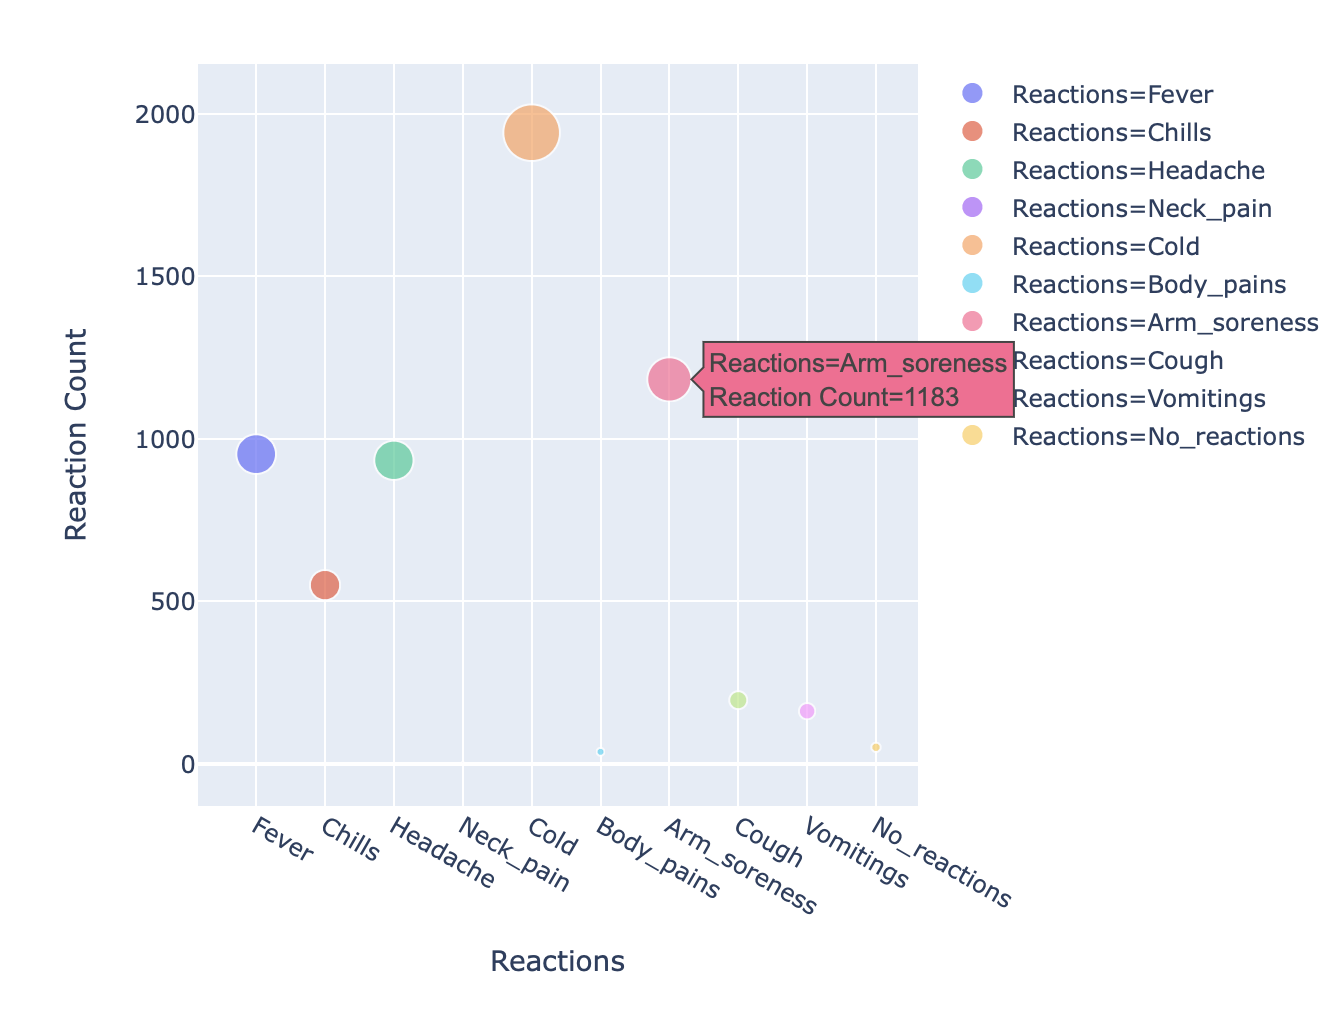